# 数据过少

In [35]:
import plotly.graph_objects as go

# 生成曲线数据
x = [1, 2, 3, 4, 5]
y1 = [0.1, 0.01, 0.001, 0.0001, 0.00001]
y2 = [0.05, 0.005, 0.0005, 0.00005, 0.000005]
y3 = [0.1, 0.01, 0.001, 0.0001, 0.00001]

# 创建交互式图形对象
fig = go.Figure()

# 添加第一条曲线
fig.add_trace(go.Scatter(x=x, y=y1, name='Curve 1'))

# 添加第二条曲线
fig.add_trace(go.Scatter(x=x, y=y2, name='Curve 2'))

# 添加第三条曲线
fig.add_trace(go.Scatter(x=x, y=y3, name='Curve 3'))

# 设置纵轴为对数刻度，并指定刻度标签的格式和位置
fig.update_layout(
    yaxis_type='log',
    yaxis_tickformat='.2e',
    yaxis_tickvals=[0.1, 0.01, 0.001, 0.0001, 0.00001],
    yaxis_ticktext=['10^-1', '10^-2', '10^-3', '10^-4', '10^-5']
)

# 显示图形
fig.show()


|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       -15.0|  6.678e-01|  2.363e-01|            7743|     6.549e-01|     2.268e-01|               7433|   6.582e-01|   3.264e-01|            10695|      2.063e+02|
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|   

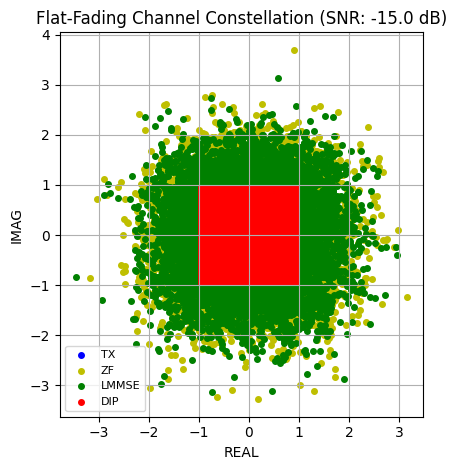

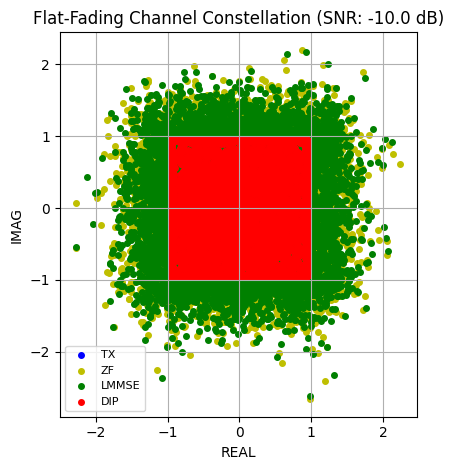

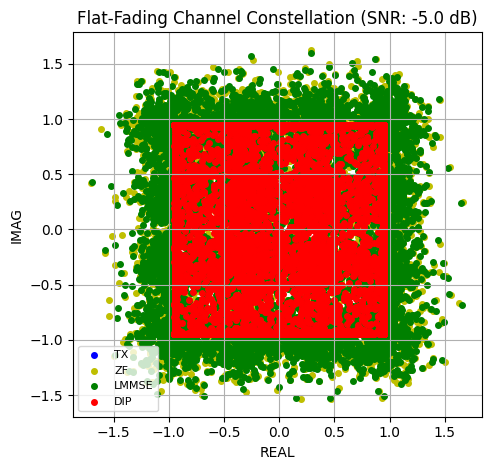

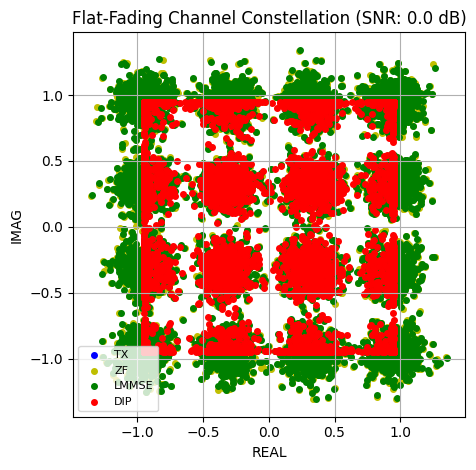

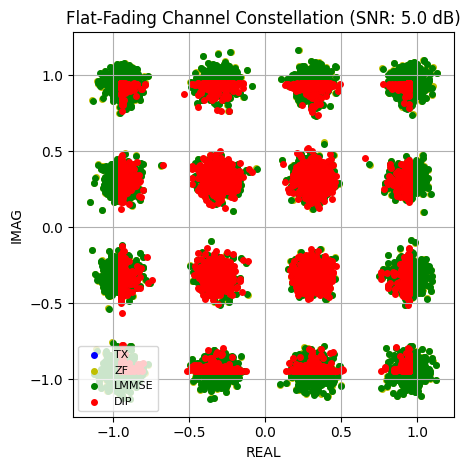

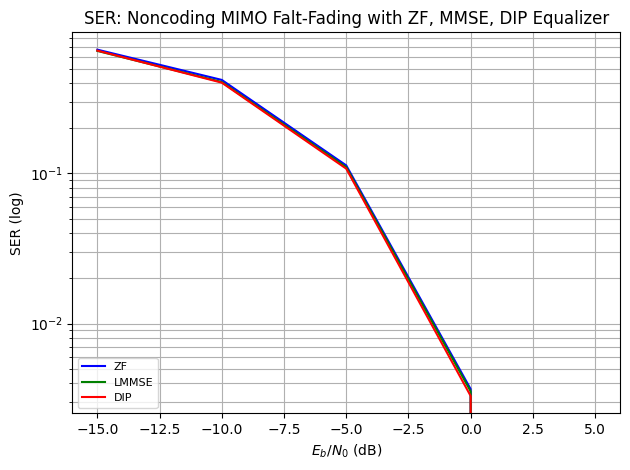

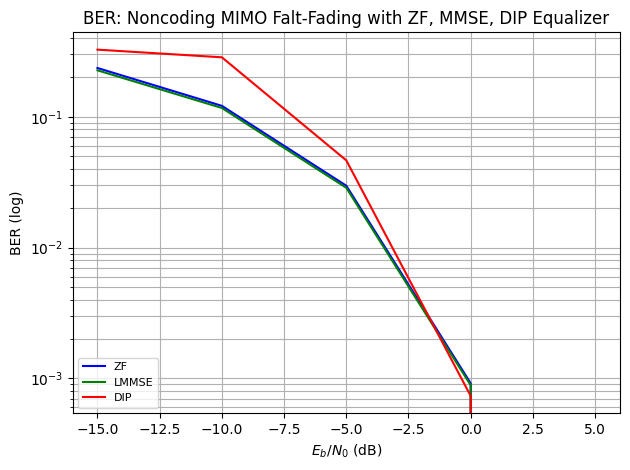

Loading BokehJS ...

Loading BokehJS ...

(array([-15., -10.,  -5.,   0.,   5.]),
 array([0.66784668, 0.4197998 , 0.11315918, 0.00366211, 0.        ]),
 array([0.65490723, 0.40649414, 0.11010742, 0.00354004, 0.        ]),
 array([0.65820312, 0.40258789, 0.10766602, 0.0032959 , 0.        ]))

In [2]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from UncodedSystemFlatFading import UncodedSystemFlatFading

Block_Length = 128         # Block Length (k)
NUM_BITS_PER_SYMBOL = 4    # Mapping: 16QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_TX_ANT = 4             # Transmit Antennas
NUM_RX_ANT = 16             # Receive Antennas

NUM_DATA_GROUP = 1        # Number of Data Group
BATCH_SIZE = 64            # Number of Parallelly Processed Batches
EBN0_DB_MIN = -15.0        # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 5.0         # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 5       # EBNO Points

model_uncoded_ff = UncodedSystemFlatFading(Block_Length, 
                                           NUM_BITS_PER_SYMBOL,
                                           CONSTELLATION_TYPE,
                                           DEMAPPING_METHOD,
                                           NUM_RX_ANT,
                                           NUM_TX_ANT)

model_uncoded_ff(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)